**TP1**

In [181]:
import pandas as pd
import numpy as np
from math import sqrt, ceil, pi
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from statistics import mean
from matplotlib import pyplot as plt

# Usada por los ítems a) y b). Genera un dataframe a partir de los parámetros
# recibidos
def generate_dataframe(d, n, C, center0, center1, diag):
  # Cantidad de puntos d-dimensionales a generar para la clase 0
  size0 = ceil(n / 2)
  # Cantidad de puntos d-dimensionales a generar para la clase 1
  size1 = n // 2

  # Genero los puntos de la clase 0
  class0 = np.random.multivariate_normal(center0, diag, size0)
  # Y luego los de la clase 1
  class1 = np.random.multivariate_normal(center1, diag, size1)

  # Concateno los puntos generados en un solo array
  data = np.concatenate((class0, class1))
  # Genero las columnas que van a representar las coordenadas de cada punto
  col = list(range(d))

  # Genero el dataframe
  df = pd.DataFrame(data, columns = col)

  # Genero la columna correspondiente a la clase a la que pertenece cada punto
  classes = [0] * size0 + [1] * size1
  # Y la agrego al dataframe
  df['Class'] = classes

  return df

# Ítem a)
def diagonal(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] * d
  center1 = [1] * d
  # Y la matriz de covarianza diagonal
  diag = np.diag([(C * sqrt(d)) ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

# Ítem b)
def parallel(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] + [0] * (d - 1)
  center1 = [1] + [0] * (d - 1)
  # Y la matriz de covarianza diagonal
  diag = np.diag([C ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

# Convierte un punto en coordenadas cartesianas a coordenadas polares
def cartesian_to_polar(x, y):
  rho = sqrt(x ** 2 + y ** 2)
  theta = np.arctan2(y, x)

  return rho, theta

# Representa la primer curva utilizada para clasificar los puntos
def curve1(theta):
  return theta / (4 * pi)

# Representa la segunda curva utilizada para clasificar los puntos
def curve2(theta):
  return (theta + pi) / (4 * pi)

# Ítem c)
def spirals(n):
  # Cantidad de puntos a generar para la clase 0
  total0 = ceil(n / 2)
  # Cantidad de puntos a generar para la clase 1
  total1 = n // 2

  # Cantidad de puntos generados pertenecientes a la clase 0
  size0 = 0
  # Cantidad de puntos generados pertenecientes a la clase 1
  size1 = 0

  # Radio del círculo
  radius = 1

  # Puntos generados a partir de una distribución uniforme
  data = []

  # Itero hasta generar todos los puntos necesarios
  while (size0 < total0 or size1 < total1):
    # Genero un punto al azar con distribución uniforme
    x, y = np.random.uniform(-radius, radius, 2)

    # Calculo sus coordenadas polares
    rho, theta = cartesian_to_polar(x, y)

    # Verifico que esté dentro del círculo
    if rho <= radius:
      # Valor para verificar si el punto está entre las dos curvas
      curves = False

      # Recorro la espiral para comprobar si el punto se encuentra entre las
      # dos curvas
      for t in [theta + (2 * pi * i) for i in range(-1, 6)]:
        # Si el punto se encuentra entre las dos curvas, y faltan puntos en
        # la clase 0, lo agrego
        if curve1(t) < rho and rho < curve2(t):
          if size0 < total0:    
            data += [(x, y, 0)]
            size0 += 1
          # Actualizo el valor de 'curves'
          curves = True
          # Y salgo del for
          continue
      # Si el punto no está entre las curvas, y faltan puntos en la clase 1,
      # lo agrego
      if size1 < total1 and not curves:
        data += [(x, y, 1)]
        size1 += 1

  # Genero las columnas para el dataframe
  col = ['x', 'y', 'Class'] 

  # Genero el dataframe
  return pd.DataFrame(data, columns = col)

**Ejercicio 1**

In [182]:
# Genera un conjunto de entrenamiento para el problema de las espirales
# anidadas y entrena un árbol de decisión
def generate_train_spirals(n):
  df = spirals(n)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  clf = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.005,
                               random_state=0,min_samples_leaf=5)
  clf.fit(X, y)
  return clf

# Genera un dataframe para el problema de las espirales anidadas, para usar como
# conjunto de test
def generate_test_spirals():
  n = 10000
  return spirals(n)

<Axes: xlabel='x', ylabel='y'>

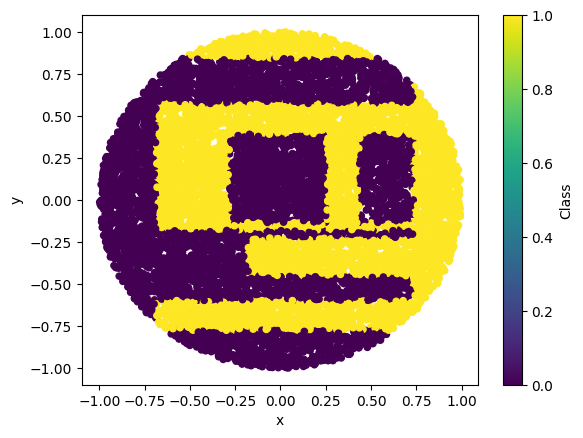

In [192]:
# Ejercicio 1

# Genero el conjunto de test
test_df = generate_test_spirals()

# Genero el primer conjunto de entrenamiento, de longitud n = 150, y entreno el
# árbol de decisión
clf = generate_train_spirals(150)

# Realizo las predicciones sobre los datos de test
test = test_df[test_df.columns[:-1]]
test['Class'] = clf.predict(test)

# Grafico las predicciones
test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='x', ylabel='y'>

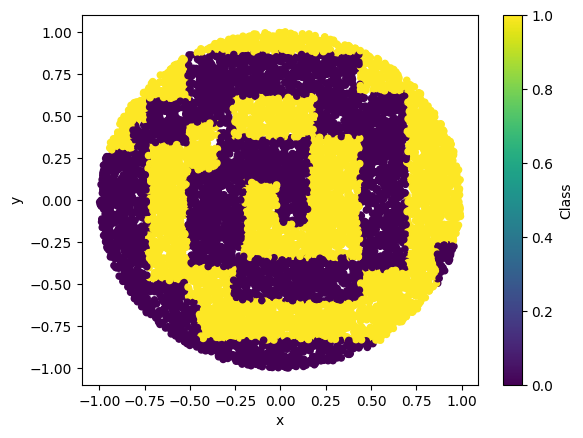

In [193]:
# Genero el segundo conjunto de entrenamiento, de longitud n = 600, y entreno el
# árbol de decisión
clf = generate_train_spirals(600)

# Realizo las predicciones sobre los datos de test
test = test_df[test_df.columns[:-1]]
test['Class'] = clf.predict(test)

# Grafico las predicciones
test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='x', ylabel='y'>

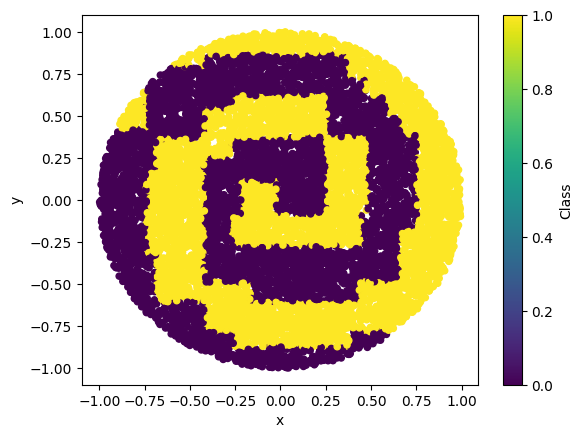

In [194]:
# Genero el primer conjunto de entrenamiento, de longitud n = 3000, y entreno el
# árbol de decisión
clf = generate_train_spirals(3000)

# Realizo las predicciones sobre los datos de test
test = test_df[test_df.columns[:-1]]
test['Class'] = clf.predict(test)

# Grafico las predicciones
test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

Para *n* = 150, no se observan las espirales anidadas. Sin embargo, para *n* = 600 y *n* = 3000 se asemejan bastante, aunque con ciertos errores.

Se puede observar que, a medida que aumenta el tamaño del conjunto de entrenamiento, se obtiene una mejor clasificación de los datos del conjunto de test. No obstante, deberían usarse conjuntos de entrenamiento de mayor tamaño que los propuestos en el ejercicio para obtener mejores resultados.

**Ejercicio 2**

In [195]:
# Genera 20 dataframes "diagonal" y 20 dataframes "paralelo" a partir de los
# parámetros recibidos
def generate_train(d,n,C):
  diags = []
  parals = []
  for i in range(20):
    diag = diagonal(d,n,C)
    paral = parallel(d,n,C)
    diags += [diag]
    parals += [paral]
  return diags, parals

# Genera un dataframe para usar como conjunto de test
def generate_test(d,C):
  n = 10000
  diag = diagonal(d,n,C)
  paral = parallel(d,n,C)
  return diag, paral

# Entreno árboles para la lista de conjuntos de entrenamiento pasada como
# arguemnto
def train(dfs):
  clfs = []
  for df in dfs:
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    clf = DecisionTreeClassifier(criterion='entropy',
                                 min_impurity_decrease=0.005,random_state=0,
                                 min_samples_leaf=5)
    clf.fit(X, y)
    clfs += [clf]
  return clfs

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, calcula
# los promedios de los errores de train y de test
def errors(dfs, test_df):
  X_test = test_df[test_df.columns[:-1]]
  y_test = test_df[test_df.columns[-1]]
  trainErrorRates = []
  testErrorRates = []
  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]
    clf = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
    clf.fit(X_train, y_train)
    trainErrorRates += [1 - accuracy_score(y_train, clf.predict(X_train))]
    testErrorRates += [1 - accuracy_score(y_test, clf.predict(X_test))]
  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

# Dada una lista de árboles de decisión, devuelve el promedio de la cantidad de
# nodos que tienen los árboles
def treeSize(clfs):
  nodes = []
  for clf in clfs:
    nodes += [clf.tree_.node_count]
  nodesMean = mean(nodes)
  return nodesMean

In [196]:
# Ejercicio 2

C = 0.78
d = 2

#Genero los conjuntos de entrenamiento

# n = 125
df1_Diag, df1_Paral = generate_train(d,125,C)

# n = 250
df2_Diag, df2_Paral = generate_train(d,250,C)

# n = 500
df3_Diag, df3_Paral = generate_train(d,500,C)

# n = 1000
df4_Diag, df4_Paral = generate_train(d,1000,C)

# n = 2000
df5_Diag, df5_Paral = generate_train(d,2000,C)

# n = 4000
df6_Diag, df6_Paral = generate_train(d,4000,C)

# Generos los conjuntos de test
test_Diag, test_Paral = generate_test(d,C)

In [197]:
# Entreno los árboles de decisión

# Diagonal
clf1_Diag = train(df1_Diag)
clf2_Diag = train(df2_Diag)
clf3_Diag = train(df3_Diag)
clf4_Diag = train(df4_Diag)
clf5_Diag = train(df5_Diag)
clf6_Diag = train(df6_Diag)

# Paralelo
clf1_Paral = train(df1_Paral)
clf2_Paral = train(df2_Paral)
clf3_Paral = train(df3_Paral)
clf4_Paral = train(df4_Paral)
clf5_Paral = train(df5_Paral)
clf6_Paral = train(df6_Paral)

<Axes: xlabel='0', ylabel='1'>

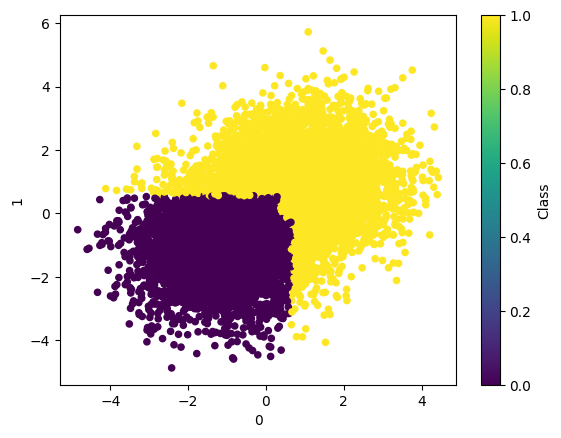

In [198]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con n = 125
test = test_Diag[test_Diag.columns[:-1]]

pred = clf1_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

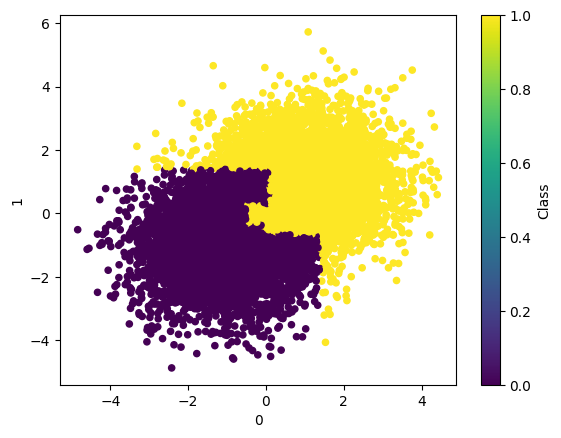

In [199]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con n = 250
test = test_Diag[test_Diag.columns[:-1]]

pred = clf2_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

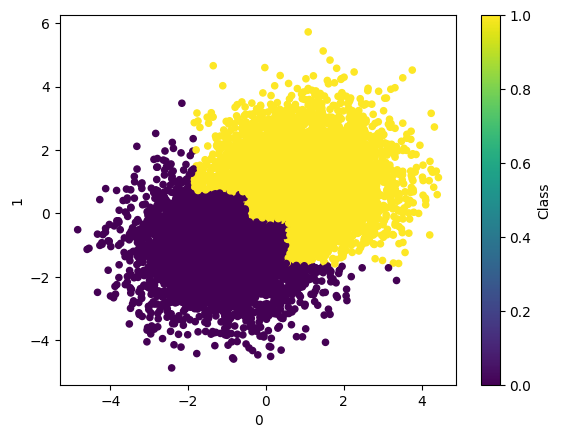

In [200]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con n = 500
test = test_Diag[test_Diag.columns[:-1]]

pred = clf3_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

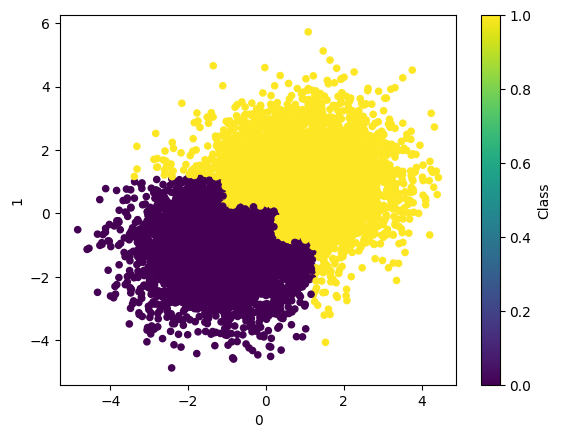

In [201]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con n = 1000
test = test_Diag[test_Diag.columns[:-1]]

pred = clf4_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

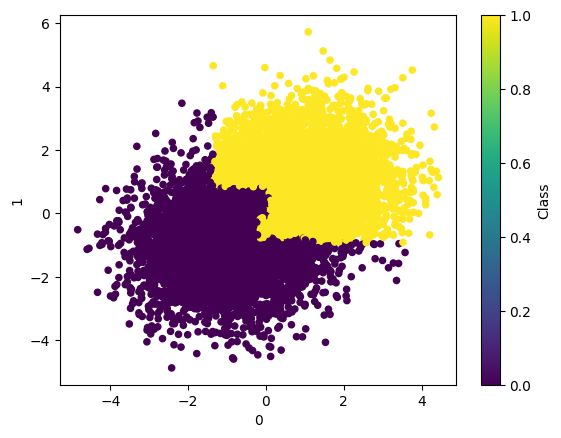

In [202]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con = 2000
test = test_Diag[test_Diag.columns[:-1]]

pred = clf5_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

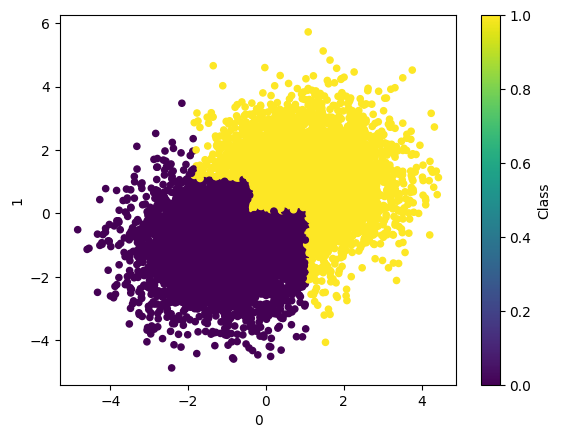

In [203]:
# Genero la gráfica sobre las predicciones para el caso diagonal, con n = 4000
test = test_Diag[test_Diag.columns[:-1]]

pred = clf6_Diag[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

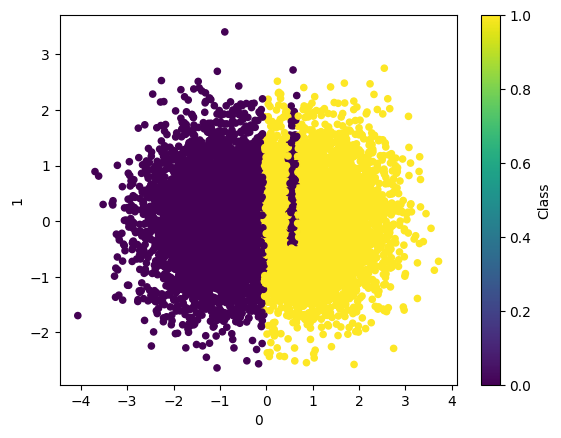

In [204]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 125
test = test_Paral[test_Paral.columns[:-1]]

pred = clf1_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

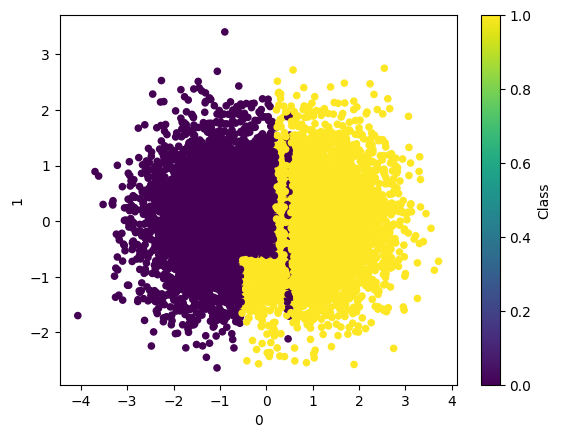

In [205]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 250
test = test_Paral[test_Paral.columns[:-1]]

pred = clf2_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

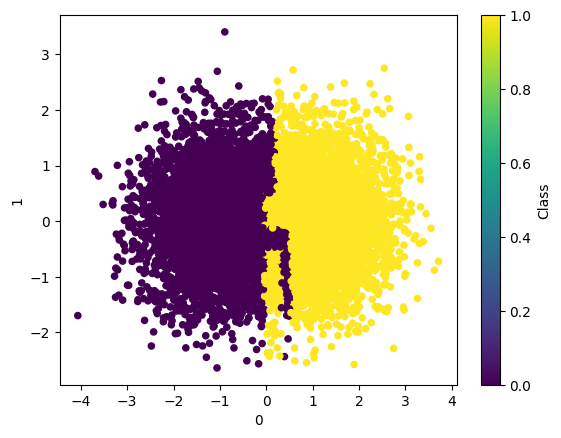

In [206]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 500
test = test_Paral[test_Paral.columns[:-1]]

pred = clf3_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

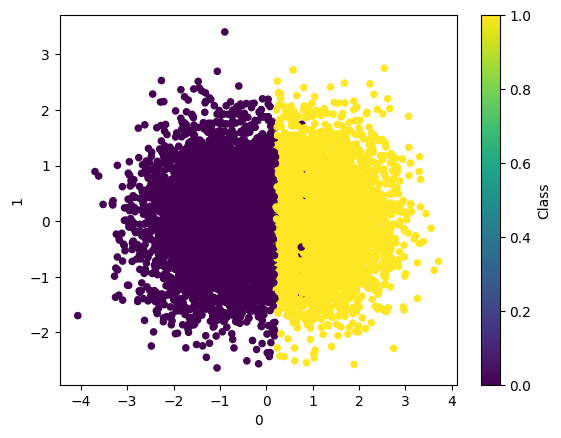

In [207]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 1000
test = test_Paral[test_Paral.columns[:-1]]

pred = clf4_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

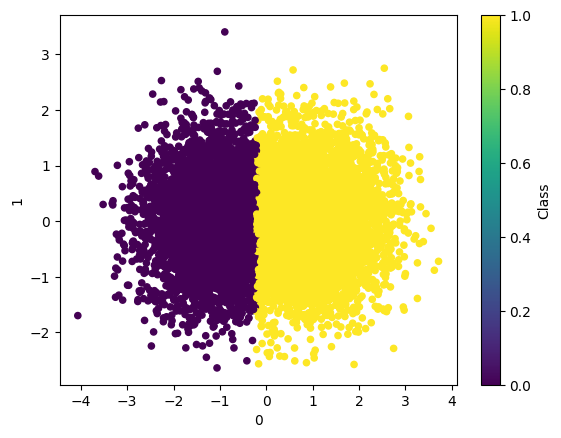

In [208]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 2000
test = test_Paral[test_Paral.columns[:-1]]

pred = clf5_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

<Axes: xlabel='0', ylabel='1'>

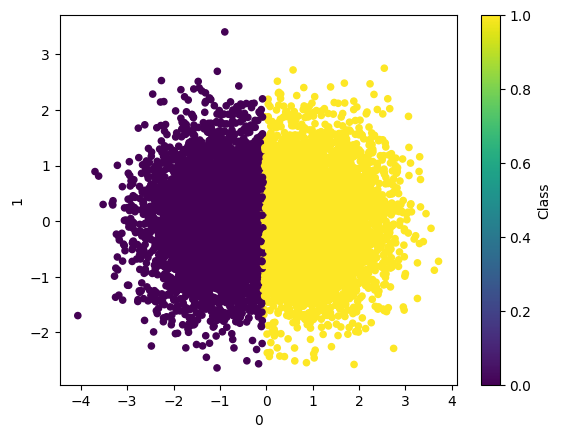

In [209]:
# Genero la gráfica sobre las predicciones para el caso paralelo, con n = 4000
test = test_Paral[test_Paral.columns[:-1]]

pred = clf6_Paral[0].predict(test)
test['Class'] = pred

test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis')

En ambos casos se puede observar que mejora la predicción al aumentar el tamaño de los conjuntos de entrenamiento.

En el caso de las gráficas para el "diagonal", se puede observar que la clasificación mejora significativamente a partir de *n* = 500, y a partir de ahí las mejoras son más sutiles.

En el caso de las gráficas para el "paralelo", se puede observar que hasta *n* = 1000 hay puntos dispersos en ambos lados (respecto al centro de la figura), mientras que a partir de *n* = 2000 se puede ver que los puntos están separados.

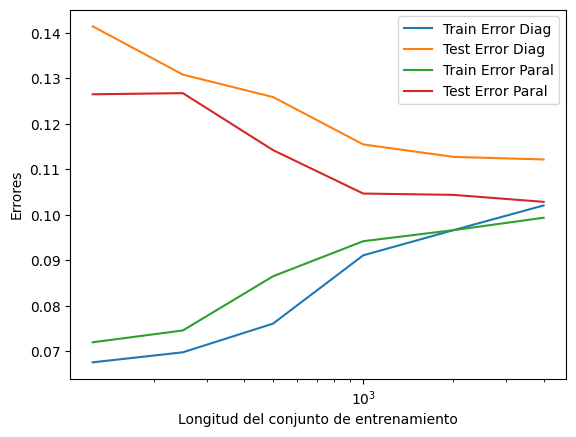

In [210]:
# Calculo los errores

# Diagonal
trainErr1_Diag, testErr1_Diag = errors(df1_Diag,test_Diag)
trainErr2_Diag, testErr2_Diag = errors(df2_Diag,test_Diag)
trainErr3_Diag, testErr3_Diag = errors(df3_Diag,test_Diag)
trainErr4_Diag, testErr4_Diag = errors(df4_Diag,test_Diag)
trainErr5_Diag, testErr5_Diag = errors(df5_Diag,test_Diag)
trainErr6_Diag, testErr6_Diag = errors(df6_Diag,test_Diag)

# Y los agrupo en listas
trainErrors_Diag = [trainErr1_Diag, trainErr2_Diag, trainErr3_Diag,
                    trainErr4_Diag, trainErr5_Diag, trainErr6_Diag]
testErrors_Diag = [testErr1_Diag, testErr2_Diag, testErr3_Diag,
                   testErr4_Diag, testErr5_Diag, testErr6_Diag]

# Paralelo
trainErr1_Paral, testErr1_Paral = errors(df1_Paral,test_Paral)
trainErr2_Paral, testErr2_Paral = errors(df2_Paral,test_Paral)
trainErr3_Paral, testErr3_Paral = errors(df3_Paral,test_Paral)
trainErr4_Paral, testErr4_Paral = errors(df4_Paral,test_Paral)
trainErr5_Paral, testErr5_Paral = errors(df5_Paral,test_Paral)
trainErr6_Paral, testErr6_Paral = errors(df6_Paral,test_Paral)

# Y los agrupo en listas
trainErrors_Paral = [trainErr1_Paral, trainErr2_Paral, trainErr3_Paral,
                     trainErr4_Paral, trainErr5_Paral, trainErr6_Paral]
testErrors_Paral = [testErr1_Paral, testErr2_Paral, testErr3_Paral,
                    testErr4_Paral, testErr5_Paral, testErr6_Paral]

# Grafico
n = [125, 250, 500, 1000, 2000, 4000]

# Diagonal
plt.plot(n, trainErrors_Diag)
plt.plot(n, testErrors_Diag)

# Paralelo
plt.plot(n, trainErrors_Paral)
plt.plot(n, testErrors_Paral)

# Etiquetas
plt.xscale('log')
plt.xlabel('Longitud del conjunto de entrenamiento')
plt.ylabel('Errores')
plt.legend(['Train Error Diag', 'Test Error Diag', 'Train Error Paral',
            'Test Error Paral'])

Se puede observar que los test error del caso "diagonal" fueron mayores a los del caso "paralelo", para todos los tamaños del conjunto de entrenamiento.

Por otro lado, en ambos casos los train error aumentan significativamente a medida que aumenta el tamaño de los conjuntos de entraniento. Pero, por el contrario, los test error disminuyen con el aumento del tamaño de los conjuntos de entrenamiento.

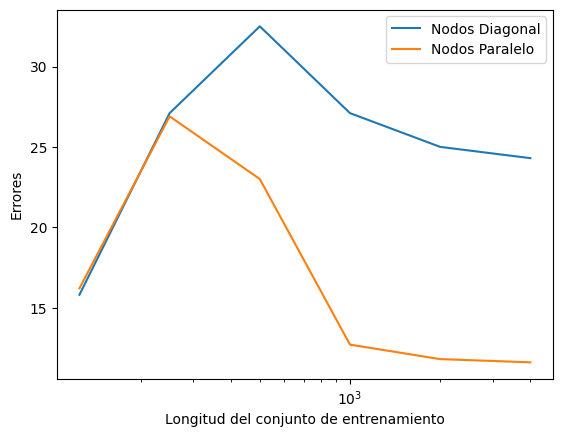

In [211]:
# Calculo los tamaños de los árboles

# Diagonal
nodes1_Diag = treeSize(clf1_Diag)
nodes2_Diag = treeSize(clf2_Diag)
nodes3_Diag = treeSize(clf3_Diag)
nodes4_Diag = treeSize(clf4_Diag)
nodes5_Diag = treeSize(clf5_Diag)
nodes6_Diag = treeSize(clf6_Diag)

# Y los agrupo en una lista
nodes_Diag = [nodes1_Diag, nodes2_Diag, nodes3_Diag, nodes4_Diag,
              nodes5_Diag, nodes6_Diag]

# Paralelo
nodes1_Paral = treeSize(clf1_Paral)
nodes2_Paral = treeSize(clf2_Paral)
nodes3_Paral = treeSize(clf3_Paral)
nodes4_Paral = treeSize(clf4_Paral)
nodes5_Paral = treeSize(clf5_Paral)
nodes6_Paral = treeSize(clf6_Paral)

# Y los agrupo en una lista
nodes_Paral = [nodes1_Paral, nodes2_Paral, nodes3_Paral, nodes4_Paral,
               nodes5_Paral, nodes6_Paral]

# Grafico
n = [125, 250, 500, 1000, 2000, 4000]

plt.plot(n, nodes_Diag)
plt.plot(n, nodes_Paral)

# Etiquetas
plt.xscale('log')
plt.xlabel('Longitud del conjunto de entrenamiento')
plt.ylabel('Errores')
plt.legend(['Nodos Diagonal', 'Nodos Paralelo'])

En ambos casos se observa un gran aumento en la cantidad de nodos de los árboles con *n* = 250. Luego, a partir de *n* = 1000, la cantidad de nodos disminuye considerablemente.

Por otra parte, se puede ver que la cantidad de nodos en el caso "diagonal" es mayor que la de los del caso "paralelo", a partir de *n* = 250.

**Ejercicio 3**

In [212]:
# Ejercicio 3

d = 5
n = 250

#Genero los conjuntos de entrenamiento

# C = 0.5
df1_Diag, df1_Paral = generate_train(d,n,0.5)
test1_Diag, test1_Paral = generate_test(d,0.5)

# C = 1.0
df2_Diag, df2_Paral = generate_train(d,n,1.0)
test2_Diag, test2_Paral = generate_test(d,1.0)

# C = 1.5
df3_Diag, df3_Paral = generate_train(d,n,1.5)
test3_Diag, test3_Paral = generate_test(d,1.5)

# C = 2.0
df4_Diag, df4_Paral = generate_train(d,n,2.0)
test4_Diag, test4_Paral = generate_test(d,2.0)

# C = 2.5
df5_Diag, df5_Paral = generate_train(d,n,2.5)
test5_Diag, test5_Paral = generate_test(d,2.5)

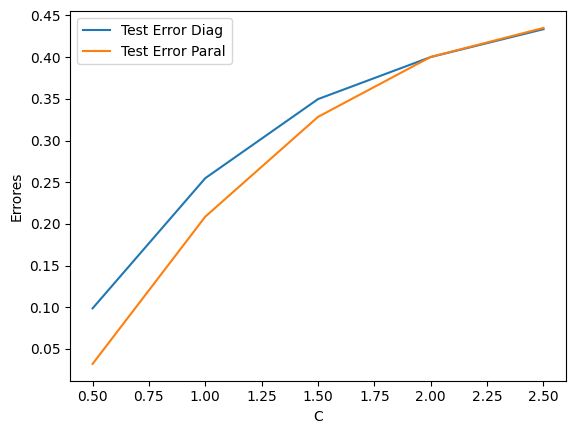

In [213]:
# Calculo los errores

# Diagonal
_, testErr1_Diag = errors(df1_Diag,test1_Diag)
_, testErr2_Diag = errors(df2_Diag,test2_Diag)
_, testErr3_Diag = errors(df3_Diag,test3_Diag)
_, testErr4_Diag = errors(df4_Diag,test4_Diag)
_, testErr5_Diag = errors(df5_Diag,test5_Diag)

# Y los agrupo en una lista
testErrors_Diag = [testErr1_Diag, testErr2_Diag, testErr3_Diag,
                   testErr4_Diag, testErr5_Diag]

# Paralelo
_, testErr1_Paral = errors(df1_Paral,test1_Paral)
_, testErr2_Paral = errors(df2_Paral,test2_Paral)
_, testErr3_Paral = errors(df3_Paral,test3_Paral)
_, testErr4_Paral = errors(df4_Paral,test4_Paral)
_, testErr5_Paral = errors(df5_Paral,test5_Paral)

# Y los agrupo en una lista
testErrors_Paral = [testErr1_Paral, testErr2_Paral, testErr3_Paral,
                    testErr4_Paral, testErr5_Paral]

# Grafico
C = [0.5, 1.0, 1.5, 2.0, 2.5]

plt.plot(C, testErrors_Diag)
plt.plot(C, testErrors_Paral)

# Etiquetas
plt.xlabel('C')
plt.ylabel('Errores')
plt.legend(['Test Error Diag', 'Test Error Paral'])

Como se puede observar en la figura, a medida que aumenta el valor de *C* el error aumenta, tanto para el caso "diagonal" como para el caso "paralelo.

Además, si bien para valores más chicos de *C* el error en el caso "diagonal" es mayor, al ir creciendo *C* se observa que el error para el caso "paralelo" crece hasta alcanzar valores cercanos a los del "diagonal".

**Ejercicio 4**

In [214]:
# Ejercicio 4

C = 0.78
n = 250

#Genero los conjuntos de entrenamiento

# d = 2
df1_Diag, df1_Paral = generate_train(2,n,C)
test1_Diag, test1_Paral = generate_test(2,C)

# d = 4
df2_Diag, df2_Paral = generate_train(4,n,C)
test2_Diag, test2_Paral = generate_test(4,C)

# d = 8
df3_Diag, df3_Paral = generate_train(8,n,C)
test3_Diag, test3_Paral = generate_test(8,C)

# d = 16
df4_Diag, df4_Paral = generate_train(16,n,C)
test4_Diag, test4_Paral = generate_test(16,C)

# d = 32
df5_Diag, df5_Paral = generate_train(32,n,C)
test5_Diag, test5_Paral = generate_test(32,C)

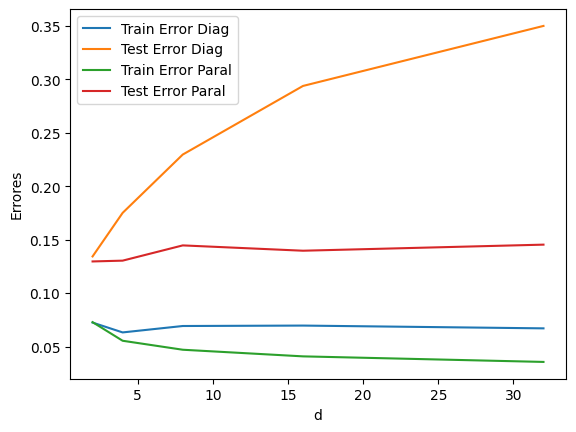

In [215]:
# Calculo los errores

# Diagonal
trainErr1_Diag, testErr1_Diag = errors(df1_Diag,test1_Diag)
trainErr2_Diag, testErr2_Diag = errors(df2_Diag,test2_Diag)
trainErr3_Diag, testErr3_Diag = errors(df3_Diag,test3_Diag)
trainErr4_Diag, testErr4_Diag = errors(df4_Diag,test4_Diag)
trainErr5_Diag, testErr5_Diag = errors(df5_Diag,test5_Diag)

# Y los agrupo en listas
trainErrors_Diag = [trainErr1_Diag, trainErr2_Diag, trainErr3_Diag,
                    trainErr4_Diag, trainErr5_Diag]
testErrors_Diag = [testErr1_Diag, testErr2_Diag, testErr3_Diag,
                   testErr4_Diag, testErr5_Diag]

# Paralelo
trainErr1_Paral, testErr1_Paral = errors(df1_Paral,test1_Paral)
trainErr2_Paral, testErr2_Paral = errors(df2_Paral,test2_Paral)
trainErr3_Paral, testErr3_Paral = errors(df3_Paral,test3_Paral)
trainErr4_Paral, testErr4_Paral = errors(df4_Paral,test4_Paral)
trainErr5_Paral, testErr5_Paral = errors(df5_Paral,test5_Paral)

# Y los agrupo en listas
trainErrors_Paral = [trainErr1_Paral, trainErr2_Paral, trainErr3_Paral,
                     trainErr4_Paral, trainErr5_Paral]
testErrors_Paral = [testErr1_Paral, testErr2_Paral, testErr3_Paral,
                    testErr4_Paral, testErr5_Paral]

# Grafico
d = [2, 4, 8, 16, 32]

# Diagonal
plt.plot(d, trainErrors_Diag)
plt.plot(d, testErrors_Diag)

# Paralelo
plt.plot(d, trainErrors_Paral)
plt.plot(d, testErrors_Paral)

# Etiquetas
plt.xlabel('d')
plt.ylabel('Errores')
plt.legend(['Train Error Diag', 'Test Error Diag', 'Train Error Paral',
            'Test Error Paral'])

En la figura se puede observar que tanto en el entramiento como en el test, el error fue mayor para el caso "diagonal".

Además, el test error "diagonal" crece notablemente a medida que aumenta *d*, a diferencia del test error "paralelo" que se mantiene relativamente "estable".